In [1]:
!ls pexels-olly-3979134.jpg

pexels-olly-3979134.jpg


In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [4]:
image_name = 'pexels-olly-3979134.jpg'

In [7]:
full_image = plt.imread(image_name)

In [20]:
full_image.shape

(3840, 5760, 3)

In [8]:
full_image

array([[[117, 118, 122],
        [117, 118, 122],
        [117, 118, 122],
        ...,
        [127, 131, 140],
        [127, 131, 140],
        [127, 131, 140]],

       [[117, 118, 122],
        [117, 118, 122],
        [117, 118, 122],
        ...,
        [127, 131, 140],
        [127, 131, 140],
        [127, 131, 140]],

       [[117, 118, 122],
        [117, 118, 122],
        [118, 119, 123],
        ...,
        [127, 131, 140],
        [127, 131, 140],
        [127, 131, 140]],

       ...,

       [[109, 114, 117],
        [109, 114, 117],
        [109, 114, 117],
        ...,
        [ 98, 102, 105],
        [ 98, 102, 105],
        [ 98, 102, 105]],

       [[109, 114, 117],
        [109, 114, 117],
        [109, 114, 117],
        ...,
        [ 98, 102, 105],
        [ 98, 102, 105],
        [ 98, 102, 105]],

       [[110, 115, 118],
        [109, 114, 117],
        [109, 114, 117],
        ...,
        [ 98, 102, 105],
        [ 98, 102, 105],
        [ 98, 102, 105]]

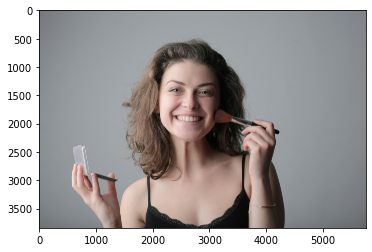

In [9]:
plt.imshow(full_image)

In [14]:
full_gray = np.mean(full_image, axis=2)

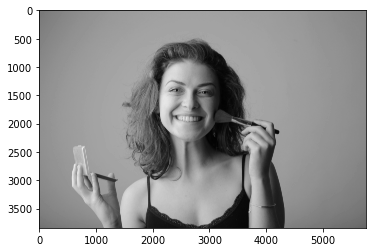

In [16]:
plt.imshow(full_gray, cmap='gray')

In [17]:
full_gray.shape

(3840, 5760)

In [18]:
full_gray

array([[119.        , 119.        , 119.        , ..., 132.66666667,
        132.66666667, 132.66666667],
       [119.        , 119.        , 119.        , ..., 132.66666667,
        132.66666667, 132.66666667],
       [119.        , 119.        , 120.        , ..., 132.66666667,
        132.66666667, 132.66666667],
       ...,
       [113.33333333, 113.33333333, 113.33333333, ..., 101.66666667,
        101.66666667, 101.66666667],
       [113.33333333, 113.33333333, 113.33333333, ..., 101.66666667,
        101.66666667, 101.66666667],
       [114.33333333, 113.33333333, 113.33333333, ..., 101.66666667,
        101.66666667, 101.66666667]])

In [19]:
np.mean([117, 118, 122])

119.0

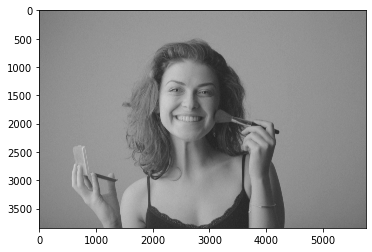

In [29]:
plt.imshow(full_gray + 100*np.random.random(full_gray.shape), cmap='gray')

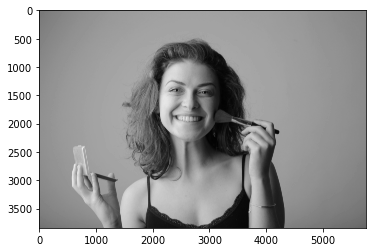

In [28]:
plt.imshow(full_gray, cmap='gray')

In [30]:

def downsample_2x2_average(image_array):
    """
    Downsamples the input image by a factor of 2 using 2x2 averaging.
    Args:
        image_array (np.ndarray): Input image as a NumPy array.
                                  Shape (H, W, 3) for RGB or (H, W) for grayscale.
    Returns:
        np.ndarray: Downsampled image as a NumPy array.
    """
    if image_array.ndim == 3:
        height, width, channels = image_array.shape
    elif image_array.ndim == 2:
        height, width = image_array.shape
        channels = None
    else:
        raise ValueError("Unsupported image format")

    # Ensure even dimensions
    height -= height % 2
    width -= width % 2
    image_array = image_array[:height, :width]

    # Create output array
    if channels:
        reduced = np.zeros((height // 2, width // 2, channels), dtype=np.uint8)
    else:
        reduced = np.zeros((height // 2, width // 2), dtype=np.uint8)

    # Loop through 2x2 blocks
    for y in range(0, height, 2):
        for x in range(0, width, 2):
            if channels:
                block = [
                    image_array[y, x],
                    image_array[y, x + 1],
                    image_array[y + 1, x],
                    image_array[y + 1, x + 1]
                ]
                avg_pixel = tuple(sum(p[c] for p in block) // 4 for c in range(channels))
                reduced[y // 2, x // 2] = avg_pixel
            else:
                avg_pixel = (
                    int(image_array[y, x]) +
                    int(image_array[y, x + 1]) +
                    int(image_array[y + 1, x]) +
                    int(image_array[y + 1, x + 1])
                ) // 4
                reduced[y // 2, x // 2] = avg_pixel

    return reduced


In [31]:
half_gray = downsample_2x2_average(full_gray)

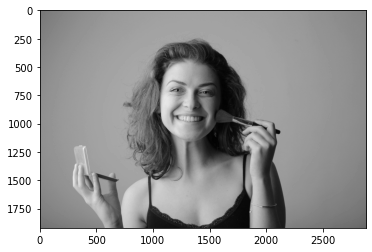

In [32]:
plt.imshow(half_gray, cmap='gray')

In [33]:
full_gray.shape

(3840, 5760)

In [34]:
half_gray.shape

(1920, 2880)

In [35]:
half_image = downsample_2x2_average(full_image)

In [36]:
half_image.shape

(1920, 2880, 3)

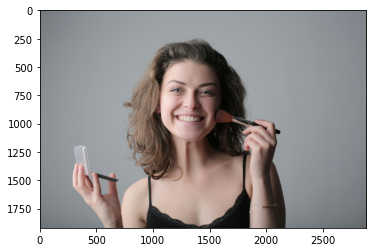

In [37]:
plt.imshow(half_image)

In [42]:
values = np.array([1,2,3])
weightages = np.array([1, 1, 1])
np.sum(values * weightages) / np.sum(weightages)

2.0

In [43]:
import numpy as np

def sliding_window_reduce(image_array, window_height=2, window_width=2, 
                          stride_y=2, stride_x=2, reduction_fn=np.mean):
    """
    Applies a reduction function over sliding windows of the input image.

    Args:
        image_array (np.ndarray): Input image as NumPy array.
                                  Shape (H, W, C) for RGB or (H, W) for grayscale.
        window_height (int): Height of the window.
        window_width (int): Width of the window.
        stride_y (int): Step size along y-axis.
        stride_x (int): Step size along x-axis.
        reduction_fn (function): Function to apply over each window. Must return a scalar or 1D array.

    Returns:
        np.ndarray: Output image with reduced size.
    """
    if image_array.ndim == 3:
        height, width, channels = image_array.shape
    elif image_array.ndim == 2:
        height, width = image_array.shape
        channels = None
    else:
        raise ValueError("Unsupported image format")

    # Determine output shape
    out_height = (height - window_height) // stride_y + 1
    out_width = (width - window_width) // stride_x + 1

    if channels:
        reduced = np.zeros((out_height, out_width, channels), dtype=np.uint8)
    else:
        reduced = np.zeros((out_height, out_width), dtype=np.uint8)

    # Sliding window reduction
    for i in range(out_height):
        for j in range(out_width):
            y = i * stride_y
            x = j * stride_x
            window = image_array[y:y+window_height, x:x+window_width]

            if channels:
                # Apply reduction per channel
                reduced_pixel = []
                for c in range(channels):
                    reduced_pixel.append(
                        int(reduction_fn(window[:, :, c]))
                    )
                reduced[i, j] = reduced_pixel
            else:
                # Grayscale
                reduced[i, j] = int(reduction_fn(window))

    return reduced


In [45]:
from PIL import Image
import numpy as np

# Load image
# img = Image.open(full_l).convert("RGB")
img_array = np.array(full_image)

# Downsample using 3x3 windows, stride of 2, and median function
reduced = sliding_window_reduce(
    img_array,
    window_height=3,
    window_width=3,
    stride_y=2,
    stride_x=2,
    reduction_fn=np.median
)

# Save or show the result
Image.fromarray(reduced).save("reduced_custom.jpg")


In [46]:
import tensorflow as tf

In [49]:
full_image.shape

(3840, 5760, 3)

In [71]:
full_image_batch = full_image.reshape(-1, 3840, 5760, 3)

In [72]:
full_image_batch = tf.cast(full_image_batch, tf.float32)


In [88]:
filter1 = [
    [ [1.,1,1], [1,1,1], [1.,1,1], [1,1,1]],
    [ [1.,1,1], [1,1,1], [1.,1,1], [1,1,1]],
    [ [1.,1,1], [1,1,1], [1.,1,1], [1,1,1]],
    [ [1,1,1], [1,1,1], [1,1,1], [1,1,1]]
]
filter2 = [
    [[1.,1,1],[0,0,0], [0,0,0],[0,0,0]],
    [[0,0,0],[0,0,0], [0,0,0],[0,0,0]],
    [[0,0,0],[0,0,0], [0,0,0],[0,0,0]],
    [[0,0,0],[0,0,0], [0,0,0],[0,0,0]]
]
filters = np.array([filter1, filter2])

In [89]:
filters = np.stack([filter1, filter2], axis=-1)

In [90]:
filters.shape

(4, 4, 3, 2)

In [91]:
full_image_batch.shape

TensorShape([1, 3840, 5760, 3])

In [95]:
conv_result = tf.nn.conv2d(full_image_batch, filters, strides=4,padding='SAME')

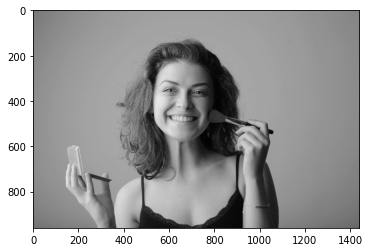

In [96]:
plt.imshow(conv_result[0, :,:,1], cmap='gray')

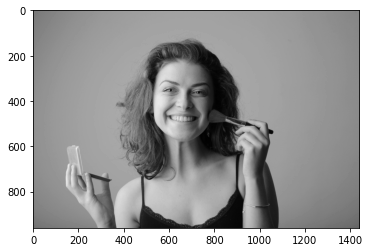

In [97]:
plt.imshow(conv_result[0, :,:,0], cmap='gray')

In [56]:
help(tf.nn.conv2d)

Help on function conv2d_v2 in module tensorflow.python.ops.nn_ops:

conv2d_v2(input, filters, strides, padding, data_format='NHWC', dilations=None, name=None)
    Computes a 2-D convolution given `input` and 4-D `filters` tensors.
    
    The `input` tensor may have rank `4` or higher, where shape dimensions `[:-3]`
    are considered batch dimensions (`batch_shape`).
    
    Given an input tensor of shape
    `batch_shape + [in_height, in_width, in_channels]` and a filter / kernel
    tensor of shape `[filter_height, filter_width, in_channels, out_channels]`,
    this op performs the following:
    
    1. Flattens the filter to a 2-D matrix with shape
       `[filter_height * filter_width * in_channels, output_channels]`.
    2. Extracts image patches from the input tensor to form a *virtual*
       tensor of shape `[batch, out_height, out_width,
       filter_height * filter_width * in_channels]`.
    3. For each patch, right-multiplies the filter matrix and the image patch
      